In [1]:
import pandas as pd
import nltk as nt
from afinn import Afinn
import matplotlib.pyplot as plt

# TODO: uncomment the following two lines for the first time you run this program!
# nt.download('punkt')
# nt.download('stopwords')

# matplotlib things
plt.figure(figsize=(3,6), dpi=60)
plt.style.use('seaborn-v0_8')

C:\Users\211612Y\AppData\Local\Temp\ipykernel_3364\3344712581.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 180x360 with 0 Axes>

In [2]:
def pos(a): return a > 0.0
def neg(a): return a < 0.0
def neut(a): return a == 0.0

# Dealing With Data (2023)
1. RQ1 -- Done (Needs Revision)

[Text(0, 0, '{:,.0f}'), Text(0, 0, '{:,.0f}'), Text(0, 0, '{:,.0f}')]

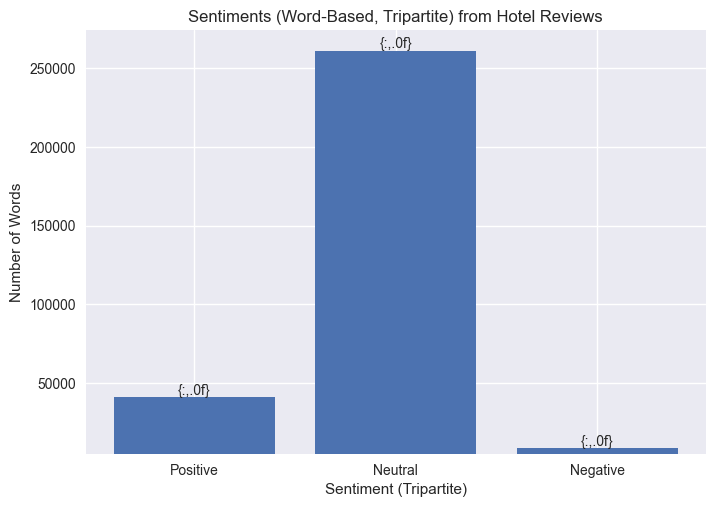

In [3]:
# define some stopwords
stop = nt.corpus.stopwords.words('english')
for i in '$-@_.&+#!*\\(),\'"?:%':
	stop.append(i)

# read the data
rdata = pd.read_csv('Datafiniti_Hotel_Reviews.csv', header=0, sep=',', on_bad_lines='skip')

# extract the title and body text of each review into a large list
rtext, rtitle = rdata['reviews.text'].astype(str), rdata['reviews.title'].astype(str)

# remove "... More" from reviews (if it exists)
# suubstitute every instance of "... More" with an empty string
rtext = rtext.str.replace('((Bad|Good):)|(\\.\\.\\. More)', '', regex=True)

# tokenise, remove stop words and puncutation
rtext_tk = (rtext.apply(nt.word_tokenize)).apply(lambda x: [wd for wd in x if wd.lower() not in stop])

# create a giant array for sentiments
rtext_stm = []

afn = Afinn() # initialise an afinn instance

# loop through the tokenised list and assign each word a score
for rtk in rtext_tk:
	sentiments = [afn.score(r) for r in rtk]
	rtext_stm.append(sentiments)

# get sentiment data in one big list
rtext_stm_flat = [i for sublist in rtext_stm for i in sublist]

# filter the sentiment data
stm_pos, stm_neut, stm_neg = list(filter(pos, rtext_stm_flat)), list(filter(neut, rtext_stm_flat)), list(filter(neg, rtext_stm_flat))
stm_cat = ['Positive', 'Neutral', 'Negative'] 
stm_totals = [len(stm_pos), len(stm_neut), len(stm_neg)]

# make the graph
fig, ax = plt.subplots()
# bars = ax.bar(stm_cat, stm_totals, width=.6)
bar_container = ax.bar(stm_cat, stm_totals)
ax.set_title('Sentiments (Word-Based, Tripartite) from Hotel Reviews')
ax.set_xlabel('Sentiment (Tripartite)')
ax.set_ylabel('Number of Words')
ax.set_ylim(bottom=5000)
ax.bar_label(bar_container, fmt='{:,.0f}')